In [14]:
#This notebook aims to illuminate the state of mental health in the industry from 2014 to 2019 and provide solutions for 
#a healthier and more sustainable future.

In [4]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 275.1 kB/s eta 0:00:27
   -- ------------------------------------- 0.5/7.8 MB 275.1 kB/s eta 0:00:27
   -- ------------------------------------- 0.5/7.8 MB 275.1 kB/s eta 0:00:27
   -- ------------------------------------- 0.5/7.8 MB 275.1 kB/s eta 0:00:27
   ---- ----------------------------------- 0.8/7.8 MB 268.5 kB/s e

In [6]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    ---------------

In [7]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [9]:
#Insert path here

dataset = 'mental_health.sqlite'
con = sql.connect(dataset)# 

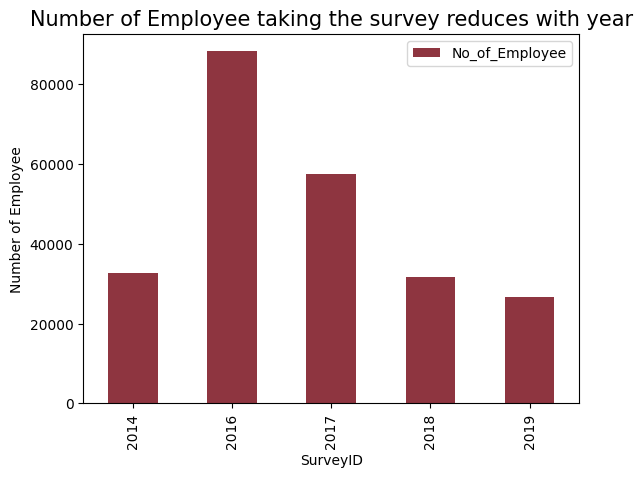

In [10]:
query = """
    SELECT
        SurveyID,
        COUNT() AS No_of_Employee
    FROM Answer
    GROUP BY SurveyID;
"""
Employee_per_survey = pd.read_sql(query, con).astype({"No_of_Employee": int})

barplot = Employee_per_survey.plot.bar(x='SurveyID',y='No_of_Employee', color = '#7A111E', alpha = 0.85)
plt.title('Number of Employee taking the survey reduces with year', fontsize = 15)
plt.ylabel('Number of Employee')
plt.xlabel('SurveyID')
plt.show()

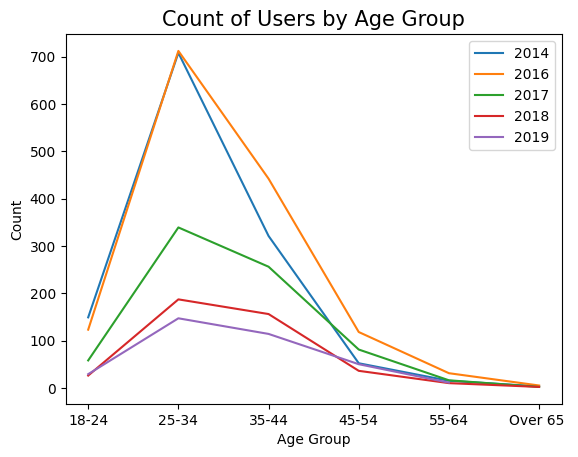

In [11]:
query = """

SELECT SurveyID,
       CASE
            WHEN AnswerText BETWEEN 18 AND 24 THEN '18-24'
            WHEN AnswerText BETWEEN 25 AND 34 THEN '25-34'
            WHEN AnswerText BETWEEN 35 AND 44 THEN '35-44'
            WHEN AnswerText BETWEEN 45 AND 54 THEN '45-54'
            WHEN AnswerText BETWEEN 55 AND 64 THEN '55-64'
            WHEN AnswerText BETWEEN 65 AND 99 THEN 'Over 65 '
        END AS age_group,
    COUNT(*) AS count
FROM Answer
WHERE SurveyID IN (2014, 2016, 2017, 2018, 2019)
AND QuestionID=1
      AND AnswerText > 18

GROUP BY SurveyID, age_group
ORDER BY SurveyID, age_group;
"""
Age_Survey = pd.read_sql(query, con)
# Get a list of unique age groups in the dataframe
SurveyID_groups = Age_Survey['SurveyID'].unique()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot a line for each age group
for SurveyID_group in SurveyID_groups:
    ax.plot(Age_Survey.loc[Age_Survey['SurveyID'] == SurveyID_group, 'age_group'], Age_Survey.loc[Age_Survey['SurveyID'] == SurveyID_group, 'count'], label=SurveyID_group)

# Set the x and y axis labels
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

# Set the title of the plot
ax.set_title('Count of Users by Age Group',fontsize = 15)

# Show the legend
ax.legend()

# show graph
plt.show()


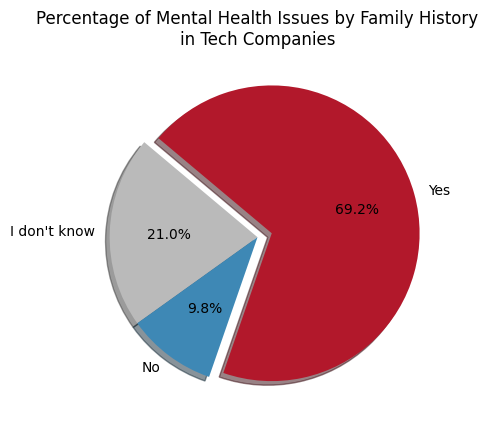

In [12]:
query = """

SELECT family_history,
       100.0 * COUNT(family_history) / SUM(COUNT(family_history)) OVER () AS percentage
FROM (
    SELECT SurveyID AS year,
            MAX(CASE WHEN (QuestionID == 4  AND AnswerText !=-1) THEN AnswerText END) AS state,
            MAX(CASE WHEN (QuestionID == 5  AND AnswerText != 1) THEN AnswerText END) AS Self_Employed,
            MAX(CASE WHEN (QuestionID == 13 AND AnswerText == 1) THEN 'Tech_company' END) AS tech_company,
            MAX(CASE WHEN (QuestionID == 33 AND AnswerText == 'Yes') THEN 1 END) AS Mental_Health,
            MAX(CASE WHEN (QuestionID == 6 ) THEN AnswerText END) AS family_history

    FROM Answer
    WHERE QuestionID IN (4,5,6, 13, 33) AND year != 2014
    GROUP BY year, UserID
    HAVING state IS NOT NULL
    AND Self_Employed IS NOT NULL
       AND tech_company IS NOT NULL
       AND Mental_Health IS NOT NULL
)
GROUP BY  family_history

"""
df = pd.read_sql(query, con)

colors = ["#BABABA", "#3E88B5", "#B2182B"]
explode = (0, 0, 0.1)
plt.pie(df["percentage"], labels=df["family_history"], explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Mental Health Issues by Family History\n"+"in Tech Companies")
plt.show()